# Simple Linear Regression - Vechicle CO2 Emission Prediction

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Under Standing the Data

#### The data set contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada

    1.MODELYEAR e.g. 2014
    2.MAKE e.g. Acura
    3.MODEL e.g. ILX
    4.VEHICLE CLASS e.g. SUV
    5.ENGINE SIZE e.g. 4.7
    6.CYLINDERS e.g 6
    7.TRANSMISSION e.g. A6
    8.FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    9.FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    10.FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    11.CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

### Read the Data

In [12]:
df = pd.read_csv("MY2020 Fuel Consumption Ratings.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199
1,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254
2,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258
3,2020,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
4,2020,Acura,RDX AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232


### Data Exploration
Lets first have a descriptive exploration on our data.

In [13]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,892.0,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,2020.0,3.172085,5.672646,12.389798,9.092937,10.905045,27.673767,253.061659
std,0.0,1.369909,1.933349,3.440659,2.134019,2.813649,7.618136,60.651158
min,2020.0,1.000000,3.000000,4.200000,4.000000,4.100000,12.000000,96.000000
25%,2020.0,2.000000,4.000000,10.100000,7.600000,9.000000,22.000000,210.000000
50%,2020.0,3.000000,6.000000,12.000000,8.800000,10.600000,27.000000,250.000000
75%,2020.0,3.800000,6.000000,14.400000,10.300000,12.600000,31.000000,291.500000
max,2020.0,8.000000,16.000000,27.200000,18.100000,23.000000,69.000000,537.000000


Lets select some features to explore more.

In [14]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,199
1,3.5,6,10.9,254
2,3.5,6,11.0,258
3,3.0,6,9.0,210
4,2.0,4,9.9,232
5,2.0,4,10.3,241
6,3.5,6,8.4,196
7,2.4,4,8.9,209
8,3.5,6,9.8,228


we can plot each of these features:

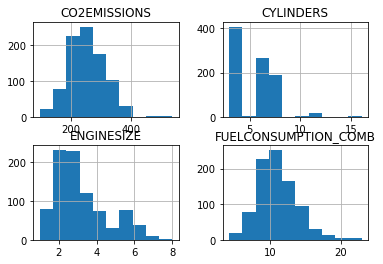

In [15]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

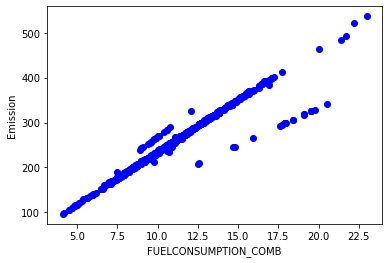

In [16]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

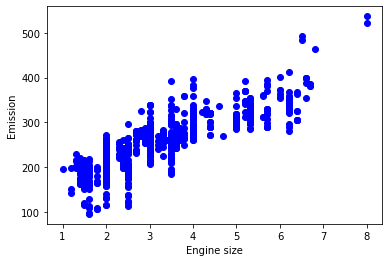

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

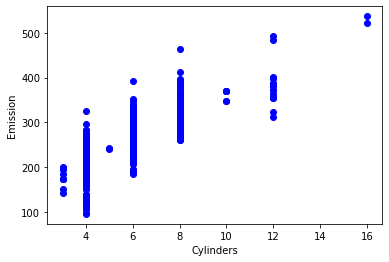

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

### Create Train Test split of the data
Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [20]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Regression Model

Linear Regression fits a linear model with coefficients  𝜃=(𝜃1,...,𝜃𝑛)  to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

#### Train data Distribution

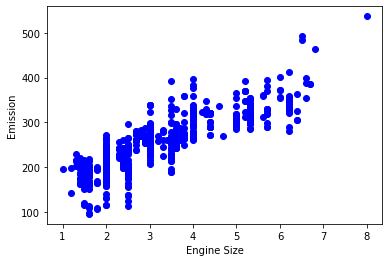

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

### Modeling

Using sklearn package to model the data

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# print the coefficient
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.03911812]]
Intercept:  [131.95544739]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

### Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emissions')

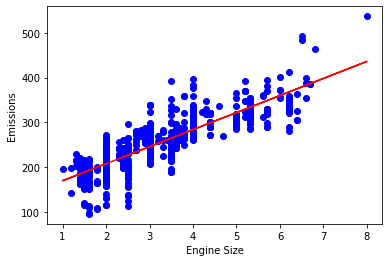

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

### Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

* Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
* Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
* R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [33]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(text_y_hat , test_y) )


Mean absolute error: 25.40
Residual sum of squares (MSE): 1093.70
R2-score: 0.64
